# Project Name: Drinking Water Potability Prediction L

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drinking_water_potability.csv')

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.nunique()

,0
ph,2785
Hardness,3276
Solids,3276
Chloramines,3276
Sulfate,2495
Conductivity,3276
Organic_carbon,3276
Trihalomethanes,3114
Turbidity,3276
Potability,2


## Data Analysis

,count
Potability,
0,1998
1,1278


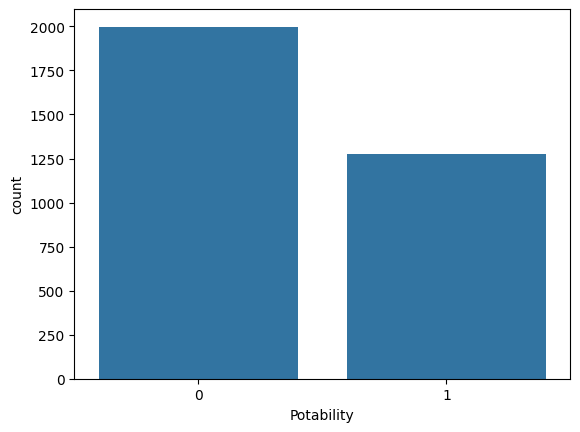

In [ ]:
sns.countplot(data=df,x=df.Potability)
df.Potability.value_counts()

In [ ]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
x = df.drop(['Potability'],axis=1)
y =df.Potability

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

In [ ]:
Ext = ExtraTreesClassifier()
Ext.fit(x,y)

ExtraTreesClassifier()

In [ ]:
print(Ext.feature_importances_)

<Axes: >

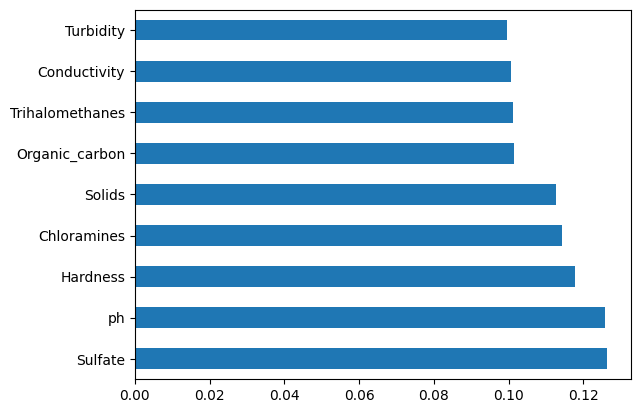

In [ ]:
feature = pd.Series(Ext.feature_importances_,index=x.columns)
feature.sort_values(ascending=True).nlargest(10).plot(kind='barh')

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale= StandardScaler()

In [ ]:
scaled= scale.fit_transform(x)

In [ ]:
scaled_df = pd.DataFrame(scaled,columns= x.columns)
scaled_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,0.259195,-0.139471,0.112415,0.961357,1.708954,-1.180651,1.306149,-1.286298
1,-2.289339,-2.036414,-0.385987,-0.307694,0.000000,2.062575,0.270597,-0.638480,0.684218
2,0.692868,0.847665,-0.240047,1.360594,0.000000,-0.094032,0.781117,0.001509,-1.167365
3,0.840950,0.547651,0.000493,0.592008,0.639519,-0.778830,1.255134,2.152874,0.848412
4,1.368569,-0.464429,-0.460249,-0.363698,-0.654177,-0.343939,-0.824357,-2.181599,0.138786


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_hat = lr.predict(X_train)
y_test_hat = lr.predict(X_test)


print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       610
           1       0.00      0.00      0.00       373

    accuracy                           0.62       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.39      0.62      0.48       983

Roc_auc score
-------------------------------------------------------
0.5

Confusion matrix
-------------------------------------------------------
[[610   0]
 [373   0]]

accuracy score
-------------------------------------------------------
test data accuracy score: 62.05493387589013
train data accuracy score: 60.57566506759704


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

## SVM (Support Vector Machines)

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_train_hat = svm.predict(X_train)
y_test_hat = svm.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat)*100)
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       610
           1       0.33      0.00      0.01       373

    accuracy                           0.62       983
   macro avg       0.48      0.50      0.39       983
weighted avg       0.51      0.62      0.48       983

Roc_auc score
-------------------------------------------------------
0.4997011383114315

Confusion matrix
-------------------------------------------------------
[[608   2]
 [372   1]]

accuracy score
-------------------------------------------------------
61.953204476093596
test data accuracy score: 61.953204476093596
train data accuracy score: 60.706498037505455


## Random Forest

In [ ]:
rf = RandomForestClassifier(n_jobs=-1,random_state=123)
rf.fit(X_train, y_train)
y_train_hat = rf.predict(X_train)
y_test_hat = rf.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       610
           1       0.66      0.33      0.44       373

    accuracy                           0.68       983
   macro avg       0.68      0.61      0.61       983
weighted avg       0.68      0.68      0.65       983

Roc_auc score
-------------------------------------------------------
0.6140596844372171

Confusion matrix
-------------------------------------------------------
[[548  62]
 [250 123]]

accuracy score
-------------------------------------------------------
test data accuracy score: 68.26042726347914
train data accuracy score: 100.0


## Using Auto ML

## H2O Auto ML

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.5-py2.py3-none-any.whl size=265646558 sha256=3658fba8b990afd32eced67c73c0b837631e40f33c00eea1a833027480163bdd
  Stored in directory: /root/.cache/pip/wheels/1a/46/4f/9b366522399306d7849672d58aefb44c9b73378d710bde2853
Successfully built h2o


## Importing the h2o Python module and H2OAutoML class

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp65loip2f
  JVM stdout: /tmp/tmp65loip2f/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp65loip2f/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,30 days
H2O_cluster_name:,H2O_from_python_unknownUser_j8esm6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


### Loading data

In [ ]:
df = h2o.import_file("/content/drinking_water_potability.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.head()

ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
nan,204.89,20791.3,7.30021,368.516,564.309,10.3798,86.991,2.96314,0
3.71608,129.423,18630.1,6.63525,nan,592.885,15.18,56.3291,4.50066,0
8.09912,224.236,19909.5,9.27588,nan,418.606,16.8686,66.4201,3.05593,0
8.31677,214.373,22018.4,8.05933,356.886,363.267,18.4365,100.342,4.62877,0
9.09222,181.102,17979,6.5466,310.136,398.411,11.5583,31.998,4.07508,0
5.58409,188.313,28748.7,7.54487,326.678,280.468,8.39973,54.9179,2.55971,0
10.2239,248.072,28749.7,7.51341,393.663,283.652,13.7897,84.6036,2.67299,0
8.63585,203.362,13672.1,4.56301,303.31,474.608,12.3638,62.7983,4.40142,0
nan,118.989,14285.6,7.80417,268.647,389.376,12.706,53.9288,3.59502,0
11.1803,227.231,25484.5,9.0772,404.042,563.885,17.9278,71.9766,4.37056,0


In [ ]:
df_train,df_test= df.split_frame(ratios=[.8])

### Splitting the data

In [ ]:
y = "Potability"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)

### Defining the model

In [ ]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

### Fitting the model

In [ ]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
11:52:24.960: Project: AutoML_1_20240929_115224
11:52:24.961: Setting stopping tolerance adaptively based on the training frame: 0.019473541261232866
11:52:24.964: Build control seed: 10
11:52:24.965: training frame: Frame key: AutoML_1_20240929_115224_training_py_3_sid_a93e    cols: 10    rows: 2637  chunks: 8    size: 191794  checksum: -7277614191792261100
11:52:24.965: validation frame: NULL
11:52:24.975: leaderboard frame: NULL
11:52:24.975: blending frame: NULL
11:52:24.976: response column: Potability
11:52:24.976: fold column: null
11:52:24.976: weights column: null
11:52:25.15: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), 

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


### Seeing the Leaderboard

In [ ]:
lb = aml.leaderboard

In [ ]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20240929_115224,0.469822,0.220733,0.442943,0.330396,0.220733
StackedEnsemble_AllModels_1_AutoML_1_20240929_115224,0.470441,0.221314,0.443553,0.33076,0.221314
XRT_1_AutoML_1_20240929_115224,0.47336,0.224069,0.439155,0.333422,0.224069
DRF_1_AutoML_1_20240929_115224,0.47348,0.224183,0.438062,0.333412,0.224183
GBM_3_AutoML_1_20240929_115224,0.47375,0.224439,0.442019,0.333081,0.224439
GBM_2_AutoML_1_20240929_115224,0.476068,0.226641,0.445627,0.334898,0.226641
GBM_4_AutoML_1_20240929_115224,0.477085,0.22761,0.444357,0.335629,0.22761
GBM_1_AutoML_1_20240929_115224,0.477764,0.228259,0.457578,0.335956,0.228259
GLM_1_AutoML_1_20240929_115224,0.488599,0.238729,0.477376,0.343801,0.238729
XGBoost_3_AutoML_1_20240929_115224,0.500282,0.250282,0.440935,0.352067,0.250282


## Getting all the model ids

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
model_ids

['StackedEnsemble_BestOfFamily_1_AutoML_1_20240929_115224',
 'StackedEnsemble_AllModels_1_AutoML_1_20240929_115224',
 'XRT_1_AutoML_1_20240929_115224',
 'DRF_1_AutoML_1_20240929_115224',
 'GBM_3_AutoML_1_20240929_115224',
 'GBM_2_AutoML_1_20240929_115224',
 'GBM_4_AutoML_1_20240929_115224',
 'GBM_1_AutoML_1_20240929_115224',
 'GLM_1_AutoML_1_20240929_115224',
 'XGBoost_3_AutoML_1_20240929_115224',
 'XGBoost_1_AutoML_1_20240929_115224',
 'XGBoost_2_AutoML_1_20240929_115224']

In [ ]:
aml.leader.model_performance(df_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.20821299125378973
RMSE: 0.45630361740160436
MAE: 0.4316732378262962
RMSLE: 0.32414762962129745
Mean Residual Deviance: 0.20821299125378973
R^2: 0.11217902253823442
Null degrees of freedom: 638
Residual degrees of freedom: 634
Null deviance: 150.0671644398887
Residual deviance: 133.04810141117164
AIC: 822.6886540135289

### Getting the model details for best performing model

In [ ]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [ ]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_1_AutoML_1_20240929_115224',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_1_AutoML_1_20240929_115224'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240929_115224_training_py_3_sid_a93e',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240929_115224_training_py_3_sid_a93e'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240929_115224_training_py_3_sid_a93e',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240929_115224_training_py_3_sid_a93e'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
  

In [ ]:
aml.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [ ]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
y_pred

predict
0.313029
0.43963
0.363536
0.185853
0.338813
0.287492
0.289748
0.61236
0.509699
0.276307
